When Vx = 2, Vx, m/s:
The rank of the P matrix is = 4 so this system is controllable.
The rank of the Q matrix is = 4 so this system is observable.
When Vx = 5, Vx, m/s:
The rank of the P matrix is = 4 so this system is controllable.
The rank of the Q matrix is = 4 so this system is observable.
When Vx = 8, Vx, m/s:
The rank of the P matrix is = 4 so this system is controllable.
The rank of the Q matrix is = 4 so this system is observable.


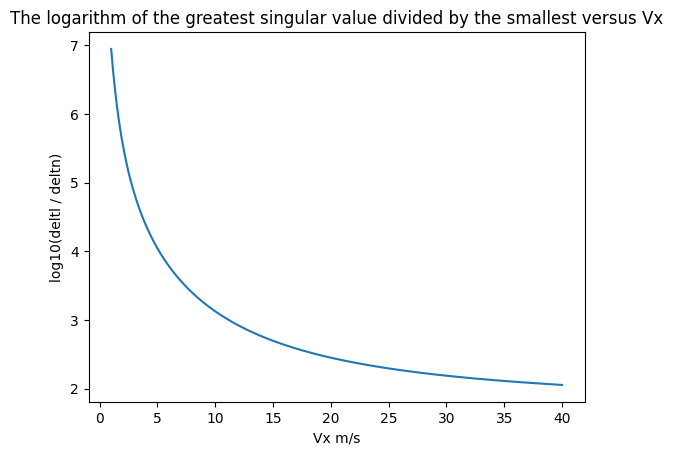

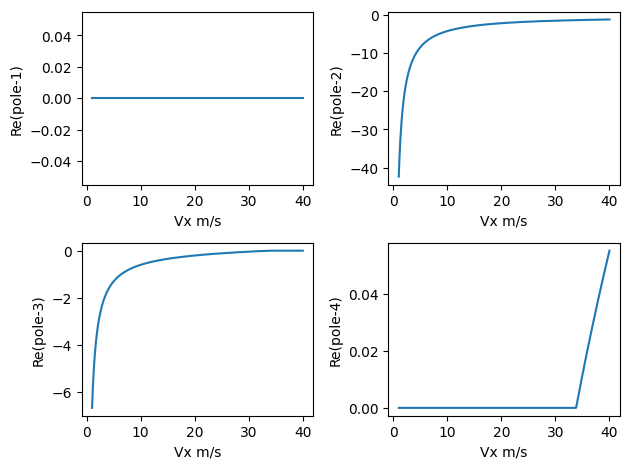

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control

# define the value of all the constant variables.
Ca = 20000
m = 1888.6
lf = 1.55
lr = 1.39
Iz = 25854

# Check the controllability and observability of the system at the following
# longitudinal velocities: 2 m/s, 5 m/s and 8 m/s.
for i in range(3):
    if i == 0:
        Vx = 2
    elif i == 1:
        Vx = 5
    else:
        Vx = 8

    A = np.array([[0, 1, 0, 0],
                  [0, -4*Ca / (m * Vx), 4*Ca/m, (-2*Ca*(lf - lr))/(m*Vx)],
                  [0, 0, 0, 1],
                  [0, (-2*Ca*(lf - lr)) / (Iz * Vx), (2*Ca*(lf - lr)) / Iz, (-2*Ca*(lf**2 + lr**2)) / (Iz*Vx)]])
    B = np.array([[0],
                  [2*Ca / m],
                  [0],
                  [(2 * Ca * lf) / Iz]])
    C = np.identity(4)

    P = np.hstack((B, np.dot(A, B), np.dot(np.linalg.matrix_power(A, 2), B), np.dot(np.linalg.matrix_power(A, 3), B)))
    Q = np.vstack((C, np.dot(C, A), np.dot(C, np.linalg.matrix_power(A, 2)), np.dot(C, np.linalg.matrix_power(A, 3))))
    rp = np.linalg.matrix_rank(P)
    rq = np.linalg.matrix_rank(Q)

    print(f"When Vx = {Vx}, Vx, m/s:")
    if rp == 4:
        print("The rank of the P matrix is =", rp, "so this system is controllable.")
    else:
        print("The rank of the P matrix is =", rp, "so this system is not controllable.")
    if rq == 4:
        print("The rank of the Q matrix is =", rq, "so this system is observable.")
    else:
        print("The rank of the Q matrix is =", rq, "so this system is not observable.")
        
v = np.linspace(1, 40, 1000).reshape(1000, 1)
r = np.empty((1000,1))
p = np.empty((1000,4))

for i in range(v.shape[0]):
    V_x = v[i][0]
    A = np.array([[0, 1, 0, 0],
                  [0, -4*Ca / (m * V_x), 4*Ca/m, (-2*Ca*(lf - lr))/(m*V_x)],
                  [0, 0, 0, 1],
                  [0, (-2*Ca*(lf - lr)) / (Iz * V_x), (2*Ca*(lf - lr)) / Iz, (-2*Ca*(lf**2 + lr**2)) / (Iz*V_x)]])
    B = np.array([[0],
                  [2*Ca / m],
                  [0],
                  [(2 * Ca * lf) / Iz]])
    C = np.identity(4)
    D = np.zeros((4, 1))  
    sys = control.StateSpace(A, B, C, D)

    # Calculating the value of logarithm
    P = np.hstack((B, np.dot(A, B), np.dot(np.linalg.matrix_power(A, 2), B), np.dot(np.linalg.matrix_power(A, 3), B)))
    _, delt_, _ = np.linalg.svd(P)
    deltl = max(delt_)
    deltn = min(delt_)
    r[i] = np.log10(deltl / deltn)
    #Calculating the poles of the system.
    poles_attime = control.pole(sys)
    for j in range(4):
        p[i,j] = poles_attime[j].real

plt.title("The logarithm of the greatest singular value divided by the smallest versus Vx")
plt.plot(v, r)
plt.xlabel("Vx m/s")
plt.ylabel("log10(deltl / deltn)")
plt.show()
plt.figure(2)

plt.subplot(2, 2, 1)
plt.xlabel("Vx m/s")
plt.ylabel("Re(pole-1)")
plt.plot(v, p[:,0])

plt.subplot(2, 2, 2)
plt.xlabel("Vx m/s")
plt.ylabel("Re(pole-2)")
plt.plot(v, p[:,1])

plt.subplot(2, 2, 3)
plt.xlabel("Vx m/s")
plt.ylabel("Re(pole-3)")
plt.plot(v, p[:,2])

plt.subplot(2, 2, 4)
plt.xlabel("Vx m/s")
plt.ylabel("Re(pole-4)")
plt.plot(v, p[:,3])

plt.tight_layout()
plt.show()